## Multiple Linear Regression

In [1]:
# y = b0 + b1*x1 + b2*x2 + b3*x3 + ...     multiple linear regression

## Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10, 6)   # Visualization library lerden alınacak grafiklerin hepsinin aynı boyutta olması için

import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [3]:
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Preparation EDA

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
# null ifadeleri görsel olarak görebilmek için (null ifade varsa beyaz çizgiler olur)

!pip install missingno
import missingno as msno

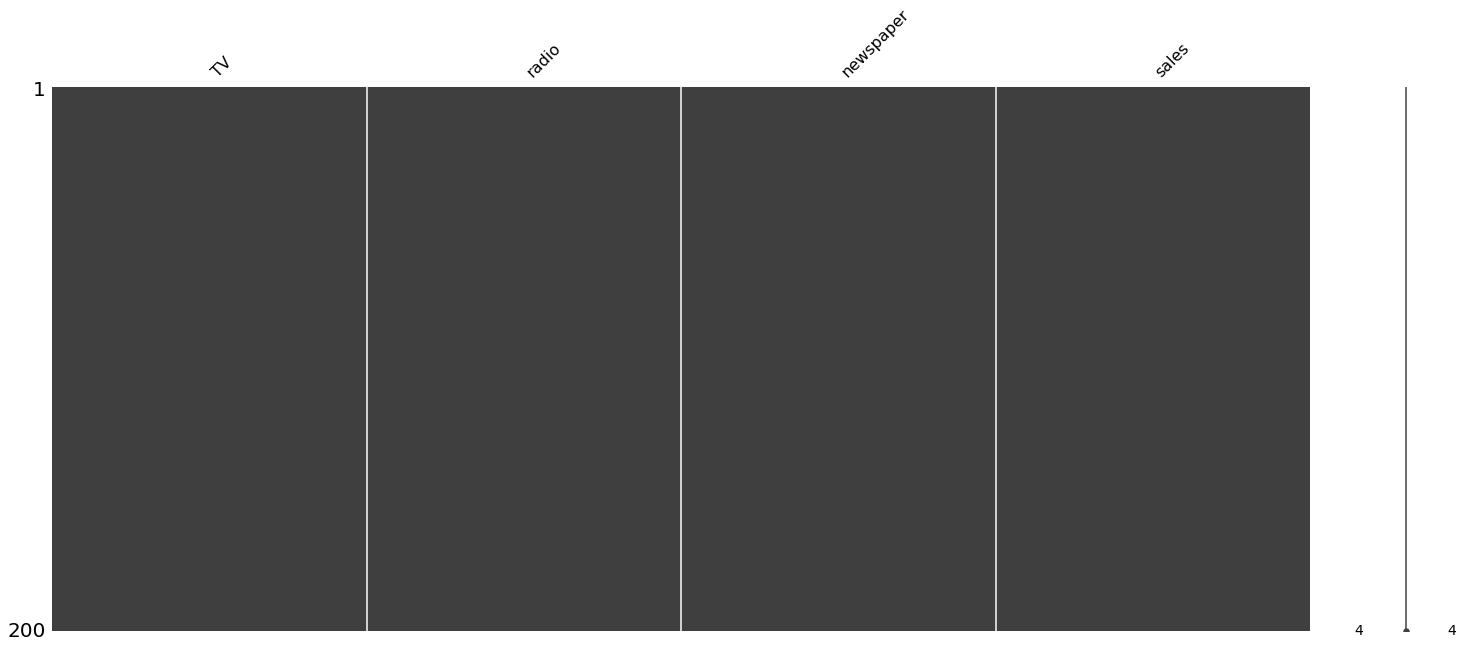

In [8]:
msno.matrix(df);

In [9]:
df.sort_values(by = "sales", ascending = False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


* standart sapma ne kadar küçükse veriler ortalama etrafında o kadar derli toplu demektir. standat sapma büyüdükçe ortalama etrafındaki dağılması genişler. 
* std sapma mean dan büyükse outlier lar vardır
* Standard sapma ne kadar dusukse data o kadar mean etrafinda toplanir
* mean ve %50(median) değerlerinin birbirinden çokta farklı olmaması iyi. 
* verinin dağılımı hakkında olumlu bilgi verir. mean ve median ın birbirinden uzak olması verinin dağılımının çarpık olabileceğini, birkaç tepeli dağılım olabileceğini gösterir

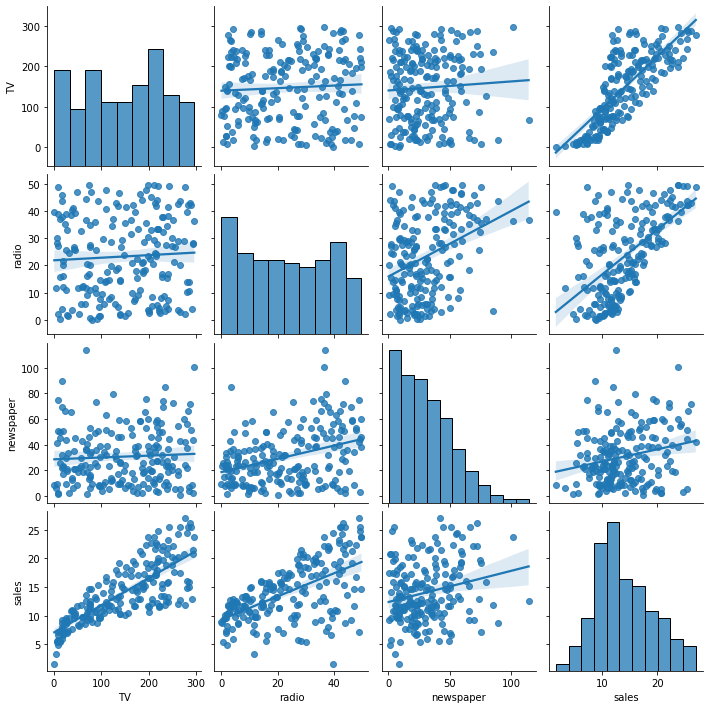

In [11]:
# columns lar arası ilişki durumunu görmek için korelasyonlarına bakıyoruz

sns.pairplot(df, kind = "reg");             # kind = "reg"  opsiyonel. regresyon doğrusunu gösterir

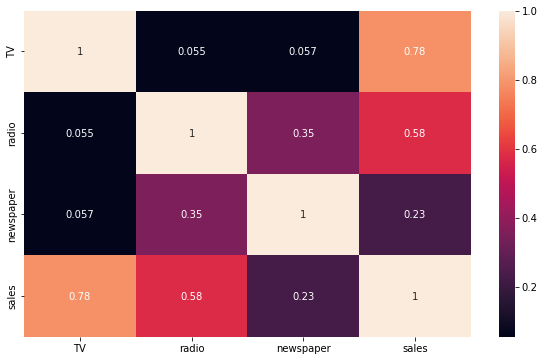

In [12]:
sns.heatmap(df.corr(), annot=True);           # korelasyon ilişkilerini gözlemlemek özellikle sütun sayısı fazla olunca
                                              # heatmap te daha kolay anlaşılır

* sales bağımlı değişkenimiz yani target; tv, radio ve newspaper reklamları ise bağımsız değişkenler yani features.
* Korelasyon, iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir
* ilk değerlendirme olarak tv reklamları ve sales arasında pozitif yönlü güçlü bir ilişki olduğunu görebiliyoruz. tv reklamları arttıkça sales artışı olabileceğini söyleyebiliriz. radio reklamları ve sales arasındada pozitif yönlü orta şiddetli bir ilişki olduğu görülüyor. newspaper reklamları ve sales arasında ise pozitif yönlü düşük bir ilişki olduğu gözlemleniyor
* en anlamlı ve etki düzeyi yüksek değişkenin tv reklamları olduğu görülüyor
* burada ayrıca radio ve tv arasında yüksek bir corelasyon olmaması model kurma sırasında radio değişkeninide kullanabileğimizi anlayabiliyoruz. tv ve radio arasında güçlü bir ilişki olmuş olsa y bağımlı değişkene olan etkilerinin birbirlerinden etkilendiklerini bu nedenle de modelde ikisinin birlikte kullanılmaması gerektiği yorumu çıkabilir. ilişkinin şideddtinin güçlü olmaması nedeniyle sales deki farkli bir varyasyonu radio reklamlarının açıklayabiliyor olabileceğini değerlendirebiliyoruz.
*
* feature value ile target value arasinda yuksuk korelasyon olmasi iyi birşeydir. Features lar arasinda cok yuksek korelasyon olmasi ise problemdir , multicolinerity (buradaki notu düzenleyelim)

In [13]:
from scipy.stats import skew

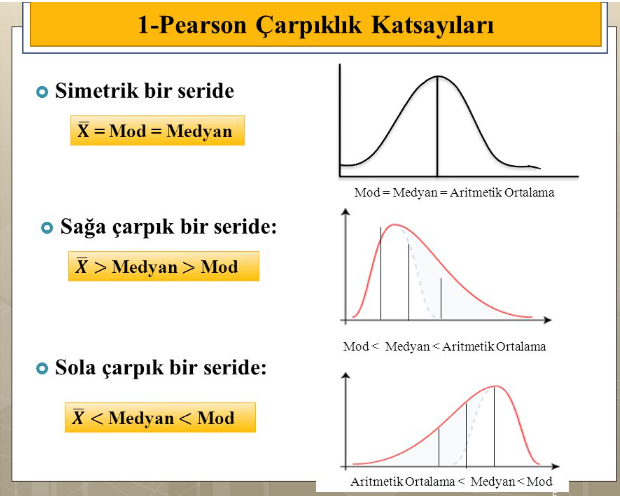

* right skew +1e doğru left skew -1e doğru
* fetaures lar arasında oluşan normal dağılım modelitahmin etmede güçlü bir skor almamızı sağlar

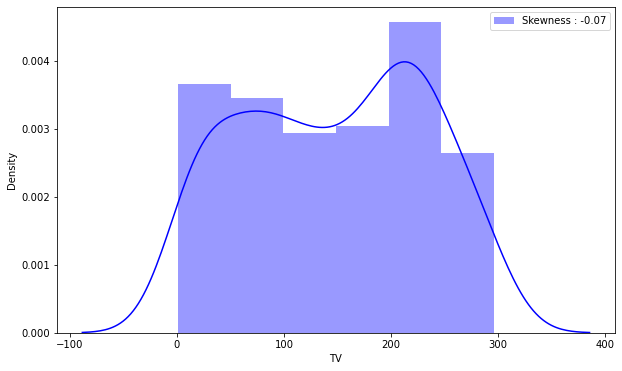

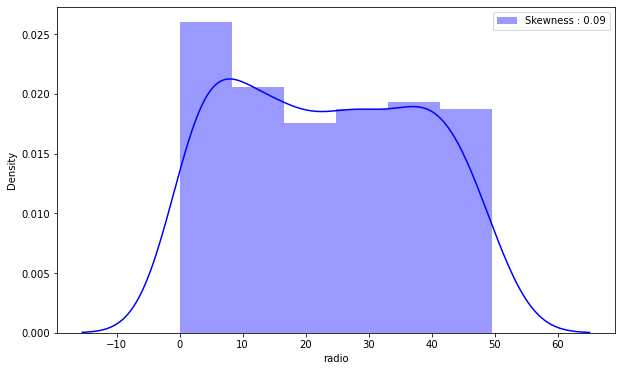

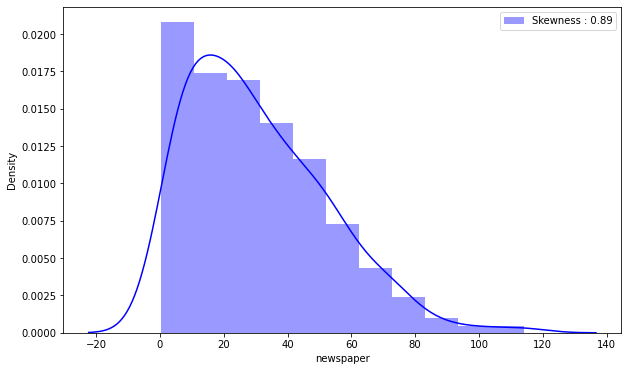

In [14]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

* tv, radio ve newspaper reklamlarının dağılımları gözlemleniyor.
* iki tepeli dağılımlar ML için normal dağılım gösteriyor güzel bir dağılım diyebiliyoruz
* tv reklarının dağılımı iki tepeli götüntüsüyle normale yakın bir dağılım sergilediği gözlemleniyor
* radio reklamlarıda tv reklamları kadar belirgin bir şekilde iki tepeli bir görüntü sergilemesede dağılımı normale yakın güzel bir dağılım diyebiliyoruz.
* skewness tahmin score unun yüksek ollmasında önemli bir parametredir. mücadele etmemiz gereken önemli bir sorundur.
* right skew +1e doğru left skew -1e doğru değer alır
* ML için skewness değerini 0 a yaklaştırmaya çalışırız. Bunun yöntemleri ilerleyen derslerde

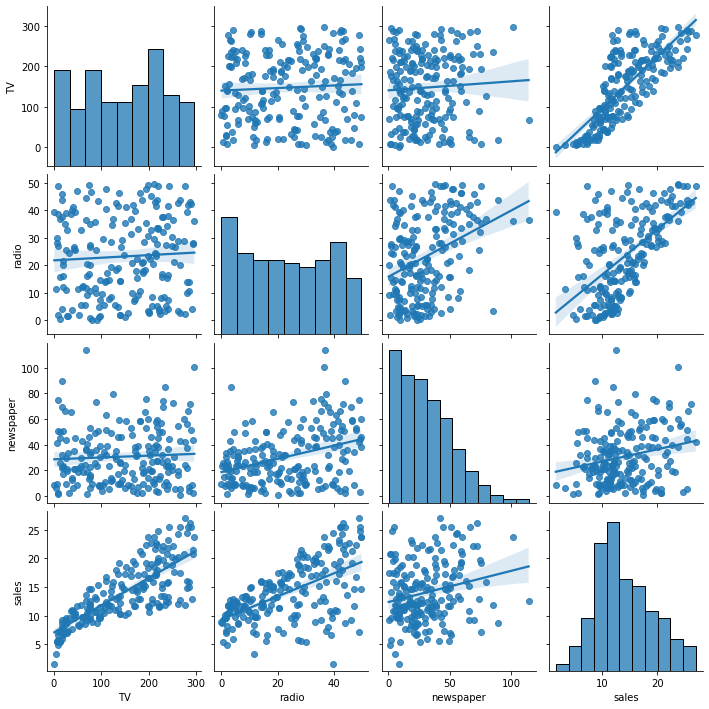

In [15]:
sns.pairplot(df, kind = "reg");

* normal dağılıma yakın dağılımları olan tv ve radio reklamlarının sales ile olan regresyonları güzel görünüyor.
* skewness dağılım sergileyen newspaper reklamlarının sales ile olan regresyonlarıda zayıf görünüyor.

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

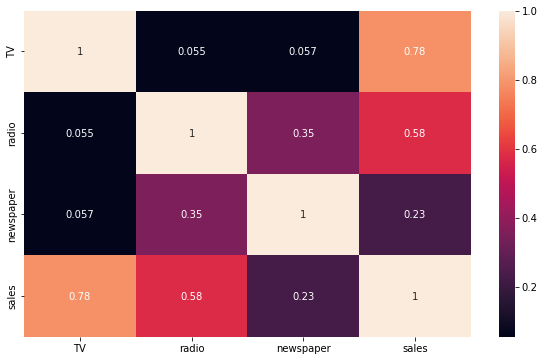

In [17]:
sns.heatmap(df.corr(), annot = True)

## Train - Test Split

* 1000 e kadar % 20/30 test % 80/70 train
* 1000 ile 100000 satır arasında %10/20 test %90/80 train
* 100000 ile 1000000 satır arasında %5 test %95 train
* 1000000 üzeri satırlık datada %1 test % 99 train

In [18]:
!pip install scikit-learn
!pip install sklearn

In [19]:
X = df.drop(columns = "sales")       # target variable olan sales column u dorp edip kalan fetaures ları X DataFrame oluşturduk

# X = df.drop("sales", axis = 1)              X dataframe için diğer bir yöntem
# X = df[["TV", "radio", "newspaper"]]        X dataframe için diğer bir yöntem


y = df["sales"]                      # sales column u target variable olarak y DataFrame oluşturduk

print(X, y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

* 2 üst kod satırında öncelikle X ve y datafram leri oluşturuldu
* X ve y dataframe leri %70 e %30 oranında X_train, y_train ve X_test, y_test olarak ayırdık. 

In [22]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\ny Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
y Test features shape : (60,)


* X_train, y_train, X_test, y_test 'in shape lerini görmek istedik
* X_train 3 columns 140 rows tan oluşuyor (140 rows %70 oluyor)
* y_test 1 column1 60 rows tan oluşuyor (60 rows %30 oluyor)

In [23]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [24]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()                        # import işlemi sonrası "model" imize LinearRegression() u atıyoruz

In [27]:
model.fit(X_train, y_train)                       # modelimizi fit ediyoruz yani X_train, y_train ile modelimizi eğitiyoruz 

LinearRegression()

In [28]:
y_pred = model.predict(X_test)                    # fit edilen (eğitilen) model ile X_test değerleri için y_pred (y tahmin)
y_pred                                            # değerleri üretiyoruz. X_test in her bir satırı için y_pred değeri bulunuyor

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

* buraya kadar 3 işlem yaptık
* 1: sklearn kütüphanemizden linear model türü olan LinearRegression() u import ederek "model" imize assign ediyoruz
* 2: train set olarak ayırdığımız verilerle (X_train, y_train) modelimizi fit ediyoruz yani eğitiyoruz. Burada X_train değerleri ile y_train değerleri arasında kurulan bir ilişkiyle formül üretiliyor. makine öğrenmesi burada gerçekleşiyor
* 3: fit edilen modelimizle, X_test değerlerini kullanarak y_pred (tahmin edilen y) değerleri buluyoruz. Eğitim sırasında oluşan formül ile X_test değerleri için y_pred değerleri bulunuyor

In [29]:
# fit edilen modelimiz için oluşan formülde features ların katsayılarını görelim
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [30]:
# fit edilen modelimiz için oluşan formuülde sabit değerimizi görelim
model.intercept_

2.7089490925159048

* y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0 
*
* y_pred = 0.044 * TV + 0.199 * radio + 0.006 * newspaper + 2.708  ----- katsayılarımızı ve sabitimizi yerine koyarak formülü elde etmiş oluyoruz

In [31]:
X_test.head(3)        # X_test' in ilk satırındaki fetaures değerleri için formülümüzü kullanarak y_pred_row1 değerini bulalım  

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2


X_test random oluştuğu için ilk sırada 95 index teki satır var. X_test teki ilk row için y_pred hesaplıyoruz

In [32]:
y_pred_row1 = sum(X_test.loc[95]*model.coef_) + model.intercept_     
y_pred_row1                                                     # 95 index numaralı ilk row için y_pred_row1 hesaplandı

16.565396297434837

### basit bir örnek

Örneğin 30 birim TV reklamı, 10 birim radio reklamı, 40 birimde gazete reklamı için harcama yapılması durumunda satışların tahmini değeri ne olur?

In [33]:
yeni_butce = pd.DataFrame([[30], [10],[40]]).T        # girilen reklam bütçelerinden oluşan bir dataframe üretiyoruz. Tranpose a
yeni_butce                                            # dikkat edelim. reklam değerleri bir satır 3 sütun olacak şekilde olmalı

,0,1,2
0,30,10,40


In [34]:
model.predict(yeni_butce)        # 30br TV reklamı, 10br radio reklamı, 40 br gazete reklamı sonrası tahmin edilen sales değeri

array([6.29890058])

### y_test gerçek değerlerini, y_pred tahmin değerlerini ve bunların arasındaki fark olan residuals ları bir dataframe olarak görelim

In [35]:
my_dict = {"actual": y_test, "prediction": y_pred, "residual": y_test-y_pred}  

In [36]:
comparing = pd.DataFrame(my_dict)
comparing

,actual,prediction,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


### comparing dataframe' inin ilk 25 satırını grafikte görelim

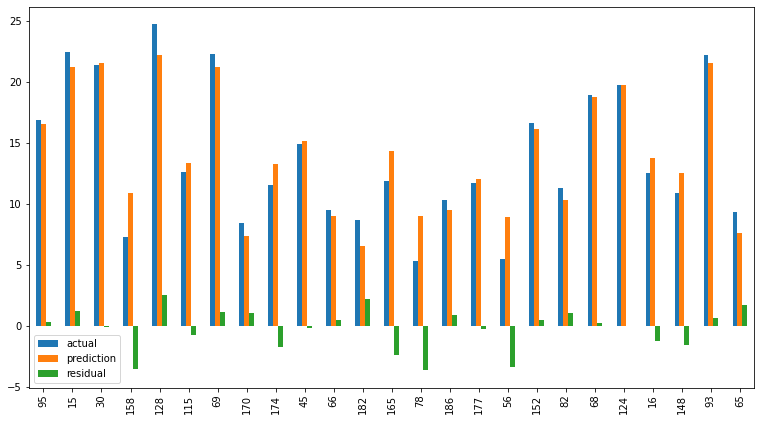

In [37]:
comparing.head(25).plot(kind = "bar", figsize = (13,7));

## Error Metrics

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### R2_scored

In [39]:
R2_scored = r2_score(y_test, y_pred)       # test setimizdeki y_test değerleri ile y_pred değerlerine göre hesaplanır

R2_scored

0.8609466508230367

R-squared: target variable daki varyansı açıklama oranı. fatures ların target variable ın değişkenliğini açıklama başarısıdır. 

Gerçek tahmin yapabilmek için ihtiyaç duyduğum verinin %86 sına sahibim.  fetaures lar sales ı %86 oranında açıklıyor. daha fazla veri verilseydi yada fatures eklenebilseydi bu oran artabilirdi.

Elimizdeki TV, radio, newspaper fatures ları sales değişkeninde yer alan değişkenliğin yaklaşık %86 (0.8609) sını açıklayabilmektedir. yani elimdeki veri sales değerini tahmin etmek için %86 oranında yeterli. %14 lük kısmı mevcut verilerle açıklayamıyoruz. outliers lar olabilir yada mevcut verilerle açıklanamayan durumlar vardır.

### adj R2_scored 

In [40]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]                        # number of observations gözlem
    p = df.shape[1]-1                      # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)      # hazır formül (adj r2)
    return adj_r2

In [41]:
adj_r2(y_test, y_pred, df)

0.8588182832335933

In [ ]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]                      # number of observations
    p = 100                              # number of independent variables
    adj_r2 = 1 - ((1-r2)*(n-1))/(n-p-1)    # hazır formül (adj r2)
    return adj_r2

In [43]:
adj_r2(y_test, y_pred, df)

0.7204887223614576

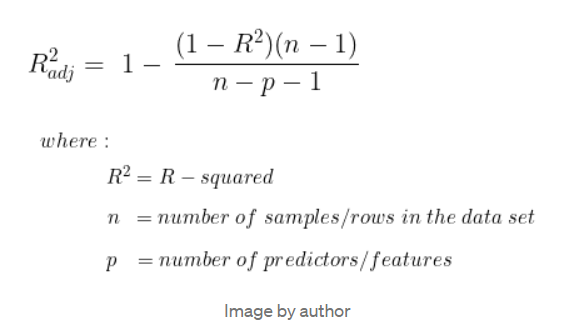

* Gözlem (rows) sayısını arttırmadan sadece yeni features lar eklersek yada dummies sonucu R2_score değerimizde yalancı iyileşmeler olabiliyor. Fetaures arttırılması durumunda herbir feature için 15/20 rows eklenmesi gerekir. Bu durumun düzenlenmesi için sklearn kütüphanesinde bir fonksiyon bulunmuyor. Bu nedenle manuel bir kod oluşturuyoruz. 

### MAE

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.511669222454909

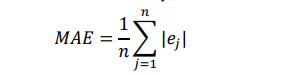
* y_test ile y_pred değerleri arasındaki farkların yani residuals/hataların mutlak değerleri ortalaması

* Ortalama mutlak hata iki sürekli değişken arasındaki farkın ölçüsüdür. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir. MAE aynı zamanda her veri noktası ile en iyi uyan çizgi arasındaki ortalama yatay mesafedir. 
* MAE değeri kolay yorumlanabilir olduğu için regresyon ve zaman serisi problemlerinde sıkça kullanılmaktadır. 
* MAE, yönlerini dikkate almadan bir dizi tahmindeki hataların ortalama büyüklüğünü ölçen, tüm tekil hataların ortalamada eşit olarak ağırlıklandırıldığı doğrusal bir skordur. 
* MAE değeri 0’dan ∞’a kadar değişebilir. 0 a yakın puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir. 
* MAE ile RMSE karşılaştırıldığında aralarında ciddi bir fark varsa sorun var demektir.

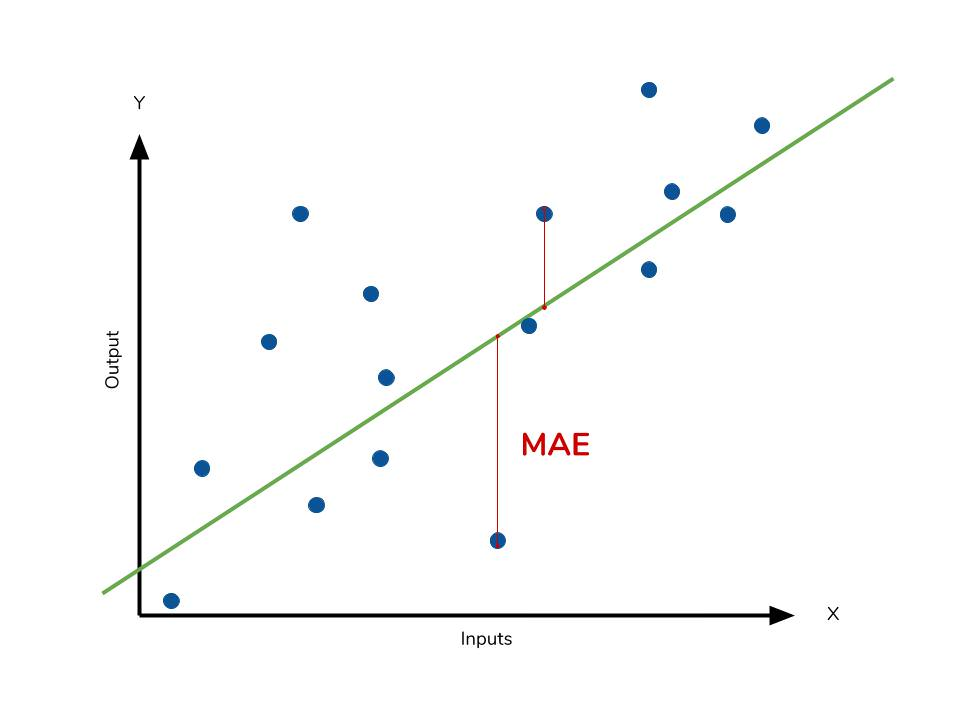

### MSE

In [45]:
mse = mean_squared_error(y_test, y_pred)
mse

3.7967972367152223

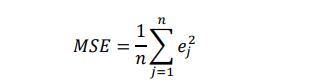
* y_test ile y_pred değerleri arasındaki farkların yani hataların kareleri ortalaması
* tahminleyicinin performansını ölçer, her zaman pozitif değerlidir ve MSE değeri sıfıra yakın olan tahminleyicilerin daha iyi bir performans gösterdiği söylenebilir.
* genelde RMSE ye gidişte bir ara durak gibi kullanılır.

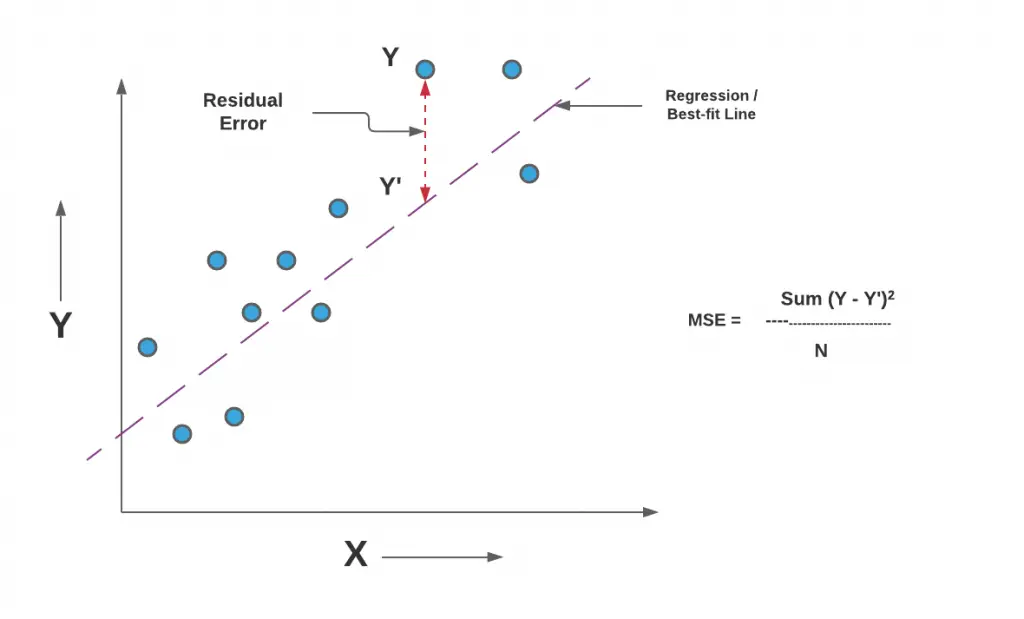

### RMSE

In [46]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446392

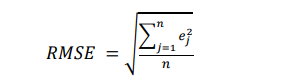
* y_test ile y_pred değerleri arasındaki farkların yani hataların kareleri ortalamasının karekökü.
* tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir. 
* RMSE tahmin hatalarının/residuals ların (kalıntıların) standart sapmasıdır. Yani, kalıntılar, regresyon hattının veri noktalarından ne kadar uzakta olduğunun bir ölçüsüdür; RMSE ise bu kalıntıların ne kadar yayıldığının bir ölçüsüdür. Başka bir deyişle, verilere en iyi uyan çizgi etrafında o verilerin ne kadar yoğun olduğunu söyler. RMSE değeri 0’dan ∞’a kadar değişebilir. 0'a yakın puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir. 
* RMSE değerinin sıfır olması modelin hiç hata yapmadığı anlamına gelir. 
* RMSE, büyük hataları daha fazla cezalandırmanın avantajına sahiptir, genelde tercih edilen yöntemdir.
* MAE ile RMSE karşılaştırıldığında aralarında ciddi bir fark varsa sorun var demektir.

In [47]:
sales_mean = df["sales"].mean()          # sales değerlerinin ortalaması
sales_mean

14.022500000000003

In [48]:
mae /sales_mean                          # mae değeri ile sales_mean oranı 0.107

0.10780311802138769

In [49]:
rmse /sales_mean                         # rmse değeri ile sales_mean oranı 0.138

0.138957903679418

## What is the concept of punishment for RMSEA error metric?

In [50]:
variables11 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}
variables22 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]} 

## RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 5800 yaptık.

In [51]:
df_11 = pd.DataFrame(variables11)
df_11

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [52]:
df_11["residual"] = abs(df_11.Actual - df_11.pred)
df_11

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [53]:
df_22 = pd.DataFrame(variables22)
df_22

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [54]:
df_22["residual"] = abs(df_22.Actual - df_22.pred)
df_22

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [55]:
df_11.residual.sum()/5   # MAE

200.0

In [56]:
df_22.residual.sum()/5   # MAE

300.0

In [57]:
((df_11.residual**2).sum()/5)**0.5    # RMSE

209.76176963403032

In [58]:
((df_22.residual**2).sum()/5)**0.5    # RMSE

392.42833740697165

* yukarıda iki farklı df in MAE ve RMSE si hesaplandı. iki df in verileri benzer olmakla birlikte sadece son pred değerleri farklıdır. df_11 de 5300 def_22 de 5800 dür. bunların dışındaki veriler aynıdır. mevcut verilerle her iki df içinde residuals değerleri hesaplanır ve sonrasında MAE ve RMSE değerleri hesaplanır. 
* df_11 in MAE si 200 çıkarken df_22 nin MAE si 300 çıkıyor.
* df_11 in RMSE si 209 çıkarken df_22 nin RMSE si 392 çıkıyor. 

buradan çıkarılabilecek yorumlar:
1. df_11 in MAE ve RMSE değerleri birbirine yakın çıkmıştır
2. df_22 nin MAE ve RMSE değerleri arasındaki fark baya artmıştır. 5800 olarak değiştirilen değer yani bir outlier RMSE nin cezalandırmasının artması nedeniyle RMSE değerinin büyük çıkmasını sağlamıştır.
3. daha öncede ifade edildiği gibi MAE ile RMSE arasındaki farkın büyük olması problem olduğunu gösterir. Bu durumda aykırı değerler var olduğunu anlayabiliriz.

* MAE, MSE ve RMSE nin değeri target variable aynı birimdendir.

## Evaluation Model

### error metrics leri bir arada görmek için 

In [59]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [60]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230367
MAE 		: 1.511669222454909
MSE 		: 3.7967972367152223
RMSE 		: 1.9485372043446392


In [61]:
y_train_pred = model.predict(X_train)

In [62]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


Train ve test seti score ları arasında ciddi farklar varsa overfitting den bahsedebiliriz.

R2_score lara arasında ciddi fark olması varyans farkından kaynaklanır. 

Buradaki verimiz için durum iyi diyebiliriz. error metrics değerleri uymlu diyebiliriz.

Train sette R2_scored değerimiz %98 ise test setinde de %91 ise ve bunlara ilave olarakta MAE ve RMSE arasındada ciddi fark varsa underfitting den bahsedebiliriz.

Buradaki kod bloğunu kullanmıyoruz sadece gözlem yapmak için kullandık. 

## Is data suitable for linear regression?

* Bir datanın linear regresyona uygun olup olmadığını anlamak için residuals ların dağılımına bakılır. 
* Residuals ların dağılımı normal dağılıma uygunsa datamız linear regression için uygundur diyebiliriz.

In [63]:
residuals = y_test - y_pred

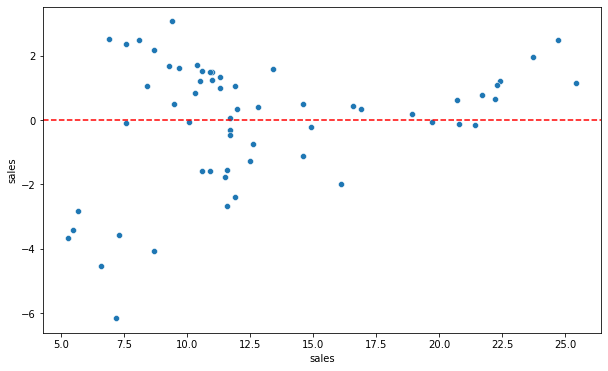

In [64]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--") #horizantal line
plt.show()

* bu tarz dağılımları daha iyi görebilmek için saçılım grafiğini scatterplot u kullanıyoruz
* y_test - y_pred = 0 ise yani residuals lar 0 ise tam ideal değerler oradadır yani mükemmel tahmin yapmış diyebiliriz. 
* residuals değeri 0 noktasına ne kadar uzakta kalıyorsa o kadar sapma vardır yani düzgün tahmin yapılamamış demektir

skewness için literaturde iki görüş vardır.Bir görüş sağa yada sola skewness olursa normal dağılım olarak kabul edilmez der.
Diğer görüşte ise saga yada sola skewness te tüm fetaures lar için de aynı durum sözkonusu ise buda başarılı olur der.

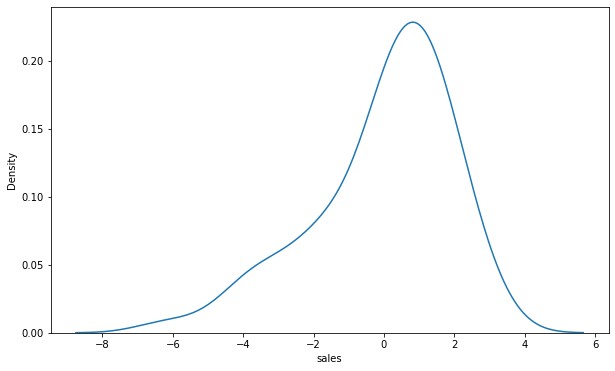

In [65]:
sns.kdeplot(residuals);     

* residuals ların dağılımını görmek için bakıyoruz. Azda olsa soldan çarpıklık olsada normal dağılıma yakın diyebiliriz

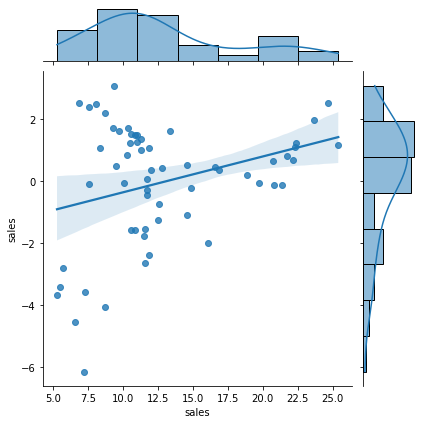

In [66]:
sns.jointplot(x = y_test, y = residuals, kind = "reg");

* dikkat edersek residuals ların dağılımı (sağda) bir üstteki kdeplot taki gibi 

normal çizgisinin etrafına yılan gibi sarılmışsa normal dağılımdır. burada da buna yaın bir görüntü var

### skewness değerini görelim 

In [68]:
skew(residuals)

-0.9865673346742734

## yellowbrick kütüphanesiyle Resiuals dağılımına bakalım

In [69]:
!pip install yellowbrick

In [70]:
from yellowbrick.regressor import ResidualsPlot

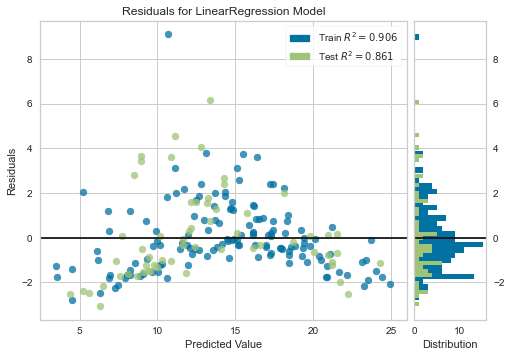

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [71]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [72]:
from yellowbrick.regressor import PredictionError

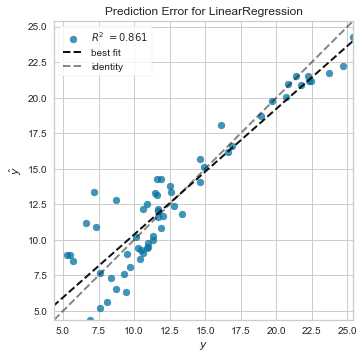

In [90]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

* bu grafikte iki çizginin best fit line ile identify line ın üstüste olması istenen durumdur. Çizgiler arasında belirgin bir fark varsa tahmin ile gerçek durumdaki hatayı buradanda görebiliriz. Çizgiler ne kadar yakınsa model okadar başarılı


## Retraining Model on Full Data

Bu aşamaya gelene kadar datamızda aldığımız score larımızı ve error metrics lerimizi karşılatırılmış, overfittin olmadığını datamızın tutarlı olduğunu ve optimal score ları verdiğini gördükten sonra modelimizi linear regresyonla kurmaya karar vermiş oluyoruz.

Burada artık tüm datayı modele alıyoruz.

burada model.fit yerine karışıklık olmaması için final_model.fit kullanıyoruz.

In [74]:
final_model = LinearRegression()
final_model.fit(X, y)                    # tüm modeli fitt etiğimiz için X ve y alındı

LinearRegression()

In [91]:
# final modelimizin katsayıları

final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

* TV deki 1 br artış 0.045 sales te artış sağlar
* radio daki 1 br artış 0.188 sales te artış sağlar
* newspaper daki 1 br artış -0.045 sales te artış sağlar

burada dikkat edilmesi gereken bir husus:
* TV reklamı korelasyonda en güçlü ilişkiyi sergilerken katsayısı daha düşük çıkmıştır. bu duruma burada takılmamak lazım arkada çalışan algoritmadan kaynaklı bir durum. bunu scale aşamasında anlayacağız

In [92]:
# final model sabiti

final_model.intercept_

2.9388893694594085

* hiç reklam verilmemesi durumunda sales değeri 2.938 olur

In [77]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [78]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [79]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### girilecek reklam değerleri için sales değeri hesaplayalım 

150 Tl TV reklamı, 20 Tl radio reklamı, 15 Tl newspaper reklamı verirsek sales değeri ne olur

In [80]:
adv = [[150, 20, 15]]
adv

[[150, 20, 15]]

In [81]:
final_model.predict(adv)

array([13.55862413])

sales değeri 13.558 olur

aşağıdaki 3 kod satırında manuel olarak sağlama yaptık

In [82]:
final_model.coef_



array([ 0.04576465,  0.18853002, -0.00103749])

In [83]:
final_model.intercept_

2.9388893694594085

In [93]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  

13.558624130495996

#### iki farklı senaryo için sales değeri hesaplayalım

In [94]:
adv_2 = [[150, 20, 15], [160, 20, 15]]                           # iki data verdik fakat ikinci data da 150 yerine 160

In [95]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [96]:
14.01627059 - 13.55862413

0.4576464599999994

TV reklamındaki 10 br artış TV'nin katsayısıyla orantılı olarak artış sağlamıştır